In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#cargamos los datos de entrada
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [8]:
dataframe.columns.values.tolist()

['ingresos',
 'gastos_comunes',
 'pago_coche',
 'gastos_otros',
 'ahorros',
 'vivienda',
 'estado_civil',
 'hijos',
 'trabajo',
 'comprar']

In [3]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.iloc[:,0:9] # agarramos las columnas predictoras solamente ['ingresos','gastos_comunes','pago_coche','gastos_otros','ahorros','vivienda','estado_civil','hijos','trabajo']
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [9]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
X_pca = pca.fit_transform(X_scaled) # obtener los componentes principales

In [10]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


In [11]:
0.29913557 + 0.23294923 + 0.11711241 + 0.10685622 + 0.09635279 #Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

0.8524062200000001

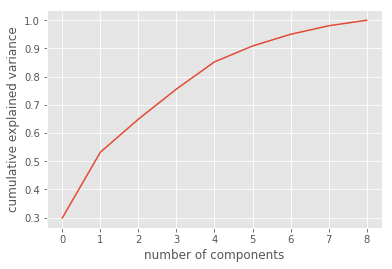

In [12]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## luego de aplicar PCA podemos concluir que podemos usar las 5 primeras componentes para realizar una prediccion, ya que estas 5 primeras componentes explican el 85% de los datos del dataset.